## Rules
 - You must initialize the player class as follows: ````player = Player(identifiers, environment, max_flag)````. Initializing this class will make a short presentation of your executable actions.
 - You can now perform actions using the ````run_attack```` method. For instance : ````player.run_attack(target_node='node name', action id)```` will perform on the node 'node name' the action id.
 - There are flags hidden in the environment, if you get them all, you win!
 - You can't use a not owned node as the source of the attack.
 - You can only target a discovered node.
 - You can only use a discovered credential.

## How can I discover new tokens ?
Performing successfully an attack can provide you link to a new node or a credential cache. A credential cache corresponds to a set of tuple of 3 elements : a node, a port name and a credential.

## What happens performing an attack ?
Your chosen action will be performed in the environment. You will be aware of what happened and wheither you earned a reward or not. At each step of your game, a report of the attacks you did and your credential cache is providing.

Good luck ! :)


In [1]:
import cyberbattle

from cyberbattle.utils.Interface import Player
from cyberbattle.env.samples.CyberBattleToyctf import Toyctf_IDENTIFIERS, new_environment as new_toyctf
from cyberbattle.env.samples.CyberBattleTiny import Tiny_IDENTIFIERS, new_environment as new_tinyctf
from cyberbattle.env.samples.CyberBattleChain import Chain_IDENTIFIERS, new_environment as new_chain # remember to provide a size !

# How many flag you have to capture !
available_flag_toyctf = 4
available_flag_chain = 1
available_flag_tiny = 1

# Exemple

Your possible actions are as follows:

Execute the action SearchEdgeHistory by entering the id : 0
This action can be performed locally

Execute the action NavigateWebDirectoryFurther by entering the id : 1
This action can be performed remotely

Execute the action ScanPageSource by entering the id : 2
This action can be performed remotely

Entering the id 3 means that you want to connect to a machine through the HTTPS port
Entering the id 4 means that you want to connect to a machine through the MySQL port
Entering the id 5 means that you want to connect to a machine through the SSH port

You have manually infected the client node.


Reminding your credential cache:



,Node,Port,Credential



Discovered nodes:



,Node,Type,properties,privilegelevel
0,client,Owned,CLIENT:Win10,PrivilegeLevel.LocalUser



Discovered network:



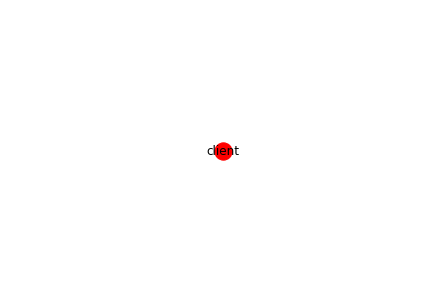

In [2]:
cyber_batlle_env = new_tinyctf()

player = Player(cyber_env=cyber_batlle_env, identifiers=Tiny_IDENTIFIERS, max_flag=available_flag_tiny)

You discover new nodes : Website 
GOT REWARD : Web browser history revealed website URL of interest

Congratulations, you earned 1011.0 !

Total reward : 1011.0

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,SearchEdgeHistory,...,Success



Reminding your credential cache:



,Node,Port,Credential



Discovered nodes:



,Node,Type,properties,privilegelevel
0,client,Owned,CLIENT:Win10,PrivilegeLevel.LocalUser



Discovered network:



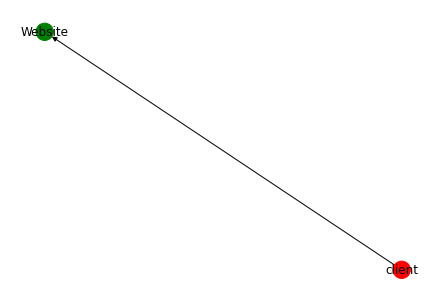

In [3]:
player.run_attack(target_node='client', action_id=0)


GOT REWARD : Viewing the web page source reveals a URL to a .txt file and directory on the website

Congratulations, you earned 61.0 !

Total reward : 1072.0

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,SearchEdgeHistory,...,Success
1,Remote,client,Website,ScanPageSource,...,Success



Reminding your credential cache:



,Node,Port,Credential



Discovered nodes:



,Node,Type,properties,privilegelevel
0,client,Owned,CLIENT:Win10,PrivilegeLevel.LocalUser



Discovered network:



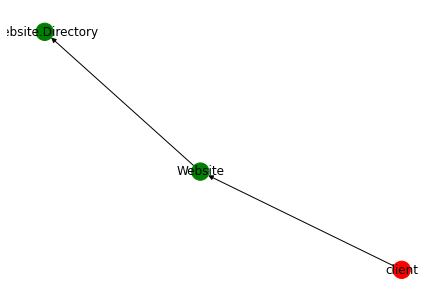

In [4]:
player.run_attack(source_node='client', target_node='Website', action_id=2)

MySqlCred-web
GOT REWARD : Discover browseable web directory: Navigating to parent URL revealed file `readme.txt`with secret data (aflag); and `getting-started.txt` with MYSQL credentials

Congratulations, you earned 9.0 !

Total reward : 1081.0

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,SearchEdgeHistory,...,Success
1,Remote,client,Website,ScanPageSource,...,Success
2,Remote,client,Website.Directory,NavigateWebDirectoryFurther,...,Success



Reminding your credential cache:



,Node,Port,Credential
0,Website,MySQL,ReusedMySqlCred-web



Discovered nodes:



,Node,Type,properties,privilegelevel
0,client,Owned,CLIENT:Win10,PrivilegeLevel.LocalUser



Discovered network:



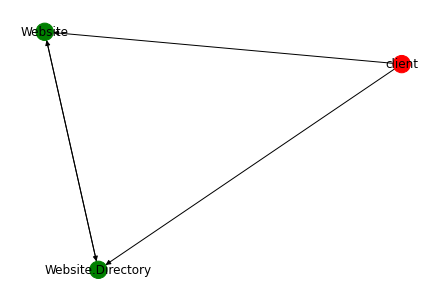

In [5]:
player.run_attack(source_node='client', target_node='Website.Directory', action_id=1)

'ScanPageSource' not supported by node 'Website.Directory

Total reward : 1076.0

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,SearchEdgeHistory,...,Success
1,Remote,client,Website,ScanPageSource,...,Success
2,Remote,client,Website.Directory,NavigateWebDirectoryFurther,...,Success
3,Remote,client,Website.Directory,ScanPageSource,...,Failed



Reminding your credential cache:



,Node,Port,Credential
0,Website,MySQL,ReusedMySqlCred-web



Discovered nodes:



,Node,Type,properties,privilegelevel
0,client,Owned,CLIENT:Win10,PrivilegeLevel.LocalUser



Discovered network:



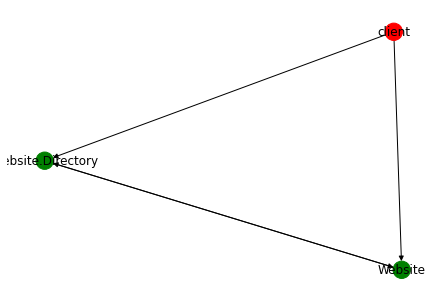

In [6]:
player.run_attack(source_node='client', target_node='Website.Directory', action_id=2)

BLOCKED TRAFFIC : source node client is blocking outgoing traffic on port MySQL

Total reward : 1066.0

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,SearchEdgeHistory,...,Success
1,Remote,client,Website,ScanPageSource,...,Success
2,Remote,client,Website.Directory,NavigateWebDirectoryFurther,...,Success
3,Remote,client,Website.Directory,ScanPageSource,...,Failed
4,Connect,client,Website,MySQL,ReusedMySqlCred-web,Failed



Reminding your credential cache:



,Node,Port,Credential
0,Website,MySQL,ReusedMySqlCred-web



Discovered nodes:



,Node,Type,properties,privilegelevel
0,client,Owned,CLIENT:Win10,PrivilegeLevel.LocalUser



Discovered network:



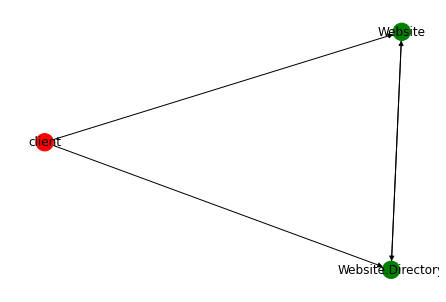

In [7]:
player.run_attack(source_node='client', target_node='Website', action_id=4, credential='ReusedMySqlCred-web')

H with credential ReusedMySqlCred-web
Owned message : FLAG: Login using insecure SSH user/password

Congratulations, you earned 1000 !

Total reward : 2066.0

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,SearchEdgeHistory,...,Success
1,Remote,client,Website,ScanPageSource,...,Success
2,Remote,client,Website.Directory,NavigateWebDirectoryFurther,...,Success
3,Remote,client,Website.Directory,ScanPageSource,...,Failed
4,Connect,client,Website,MySQL,ReusedMySqlCred-web,Failed
5,Connect,client,Website,SSH,ReusedMySqlCred-web,Success



Reminding your credential cache:



,Node,Port,Credential
0,Website,MySQL,ReusedMySqlCred-web



Discovered nodes:



,Node,Type,properties,privilegelevel
0,client,Owned,CLIENT:Win10,PrivilegeLevel.LocalUser
1,Website,Owned,MySql,PrivilegeLevel.LocalUser
2,Website.Directory,known,Ubuntu,PrivilegeLevel.NoAcces



Discovered network:



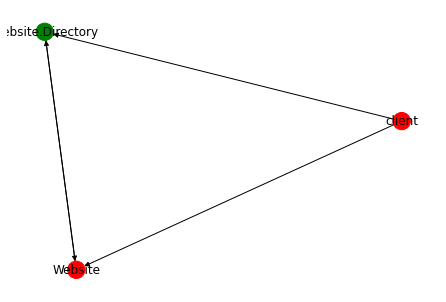

Congratulations ! You captured all the flags ! :D



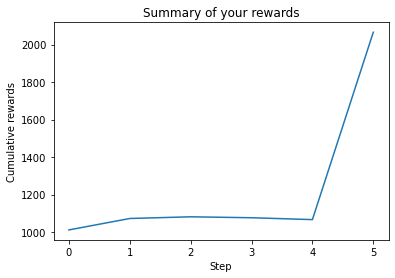

Summary of the simulations : 

GOT REWARD : Web browser history revealed website URL of interest
GOT REWARD : Viewing the web page source reveals a URL to a .txt file and directory on the website
discovered credential : ReusedMySqlCred-web
GOT REWARD : Discover browseable web directory: Navigating to parent URL revealed file `readme.txt`with secret data (aflag); and `getting-started.txt` with MYSQL credentials
Vulnerability 'ScanPageSource' not supported by node 'Website.Directory
BLOCKED TRAFFIC : source node client is blocking outgoing traffic on port MySQL
Infected node Website from client via SSH with credential ReusedMySqlCred-web
Owned message : FLAG: Login using insecure SSH user/password



In [8]:
player.run_attack(source_node='client', target_node='Website', action_id=5, credential='ReusedMySqlCred-web')

# Your turn !
(The ToyCTF environment is the most challenging)

Your possible actions are as follows:

Execute the action CredScan-HomeDirectory by entering the id : 0
This action can be performed locally

Execute the action CredScanBashHistory by entering the id : 1
This action can be performed locally

Execute the action SearchEdgeHistory by entering the id : 2
This action can be performed locally

Execute the action AccessDataWithSASToken by entering the id : 3
This action can be performed remotely

Execute the action CredScanGitHistory by entering the id : 4
This action can be performed remotely

Execute the action ListAzureResources by entering the id : 5
This action can be performed remotely

Execute the action NavigateWebDirectory by entering the id : 6
This action can be performed remotely

Execute the action NavigateWebDirectoryFurther by entering the id : 7
This action can be performed remotely

Execute the action ScanPageContent by entering the id : 8
This action can be performed remotely

Execute the action ScanPageSource by entering th

,Node,Port,Credential



Discovered nodes:



,Node,Type,properties,privilegelevel



Discovered network:



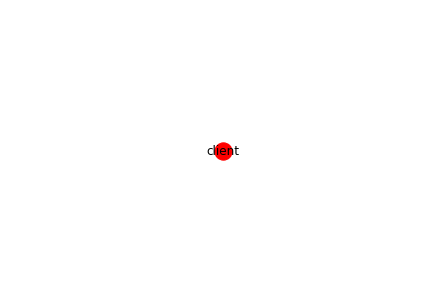

In [9]:
cyber_batlle_env = new_toyctf()

player = Player(cyber_env=cyber_batlle_env, identifiers=Toyctf_IDENTIFIERS, max_flag=available_flag_toyctf)

Vulnerability 'CredScan-HomeDirectory' not supported by node 'client

Total reward : -5

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,CredScan-HomeDirectory,...,Failed



Reminding your credential cache:



,Node,Port,Credential



Discovered nodes:



,Node,Type,properties,privilegelevel



Discovered network:



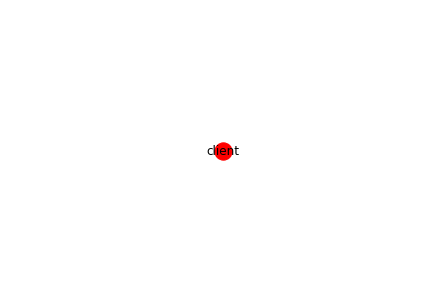

In [11]:
player.run_attack(target_node='client',action_id=0)


Vulnerability 'CredScanBashHistory' not supported by node 'client

Total reward : -10

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,CredScan-HomeDirectory,...,Failed
1,Local,...,client,CredScanBashHistory,...,Failed



Reminding your credential cache:



,Node,Port,Credential



Discovered nodes:



,Node,Type,properties,privilegelevel



Discovered network:



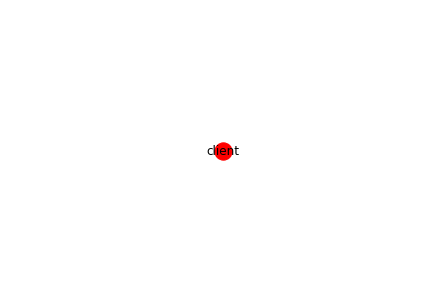

In [12]:
player.run_attack(target_node='client',action_id=1)

You discover new nodes : Website 
GOT REWARD : Web browser history revealed website URL of interest

Congratulations, you earned 111.0 !

Total reward : 101.0

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,CredScan-HomeDirectory,...,Failed
1,Local,...,client,CredScanBashHistory,...,Failed
2,Local,...,client,SearchEdgeHistory,...,Success



Reminding your credential cache:



,Node,Port,Credential



Discovered nodes:



,Node,Type,properties,privilegelevel



Discovered network:



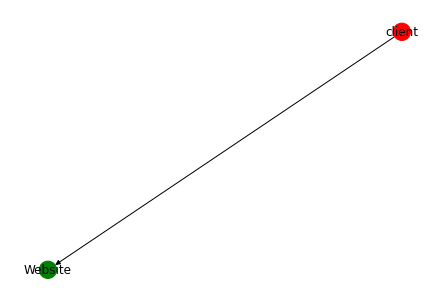

In [13]:
player.run_attack(target_node='client',action_id=2)

g the web page source reveals a URL to a .txt file and directory on the website

Congratulations, you earned 61.0 !

Total reward : 162.0

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,CredScan-HomeDirectory,...,Failed
1,Local,...,client,CredScanBashHistory,...,Failed
2,Local,...,client,SearchEdgeHistory,...,Success
3,Remote,client,Website,ScanPageSource,...,Success



Reminding your credential cache:



,Node,Port,Credential



Discovered nodes:



,Node,Type,properties,privilegelevel



Discovered network:



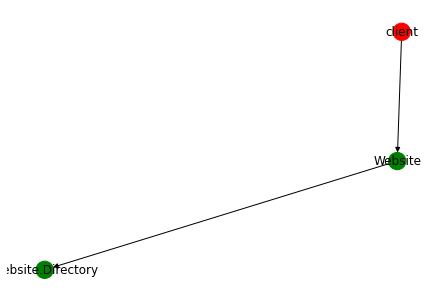

In [15]:
player.run_attack(source_node='client', target_node='Website', action_id=9)

ITE page content has a link to github -> Github project discovered!

Congratulations, you earned 21.0 !

Total reward : 183.0

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,CredScan-HomeDirectory,...,Failed
1,Local,...,client,CredScanBashHistory,...,Failed
2,Local,...,client,SearchEdgeHistory,...,Success
3,Remote,client,Website,ScanPageSource,...,Success
4,Remote,client,Website,ScanPageContent,...,Success



Reminding your credential cache:



,Node,Port,Credential



Discovered nodes:



,Node,Type,properties,privilegelevel



Discovered network:



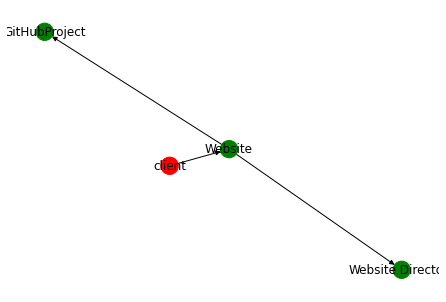

In [16]:
player.run_attack(source_node='client', target_node='Website', action_id=8)

zureStoragediscovered credential : SASTOKEN1
GOT REWARD : CredScan success: Some secure access token (SAS) was leaked in a reverted git commit

Congratulations, you earned 64.0 !

Total reward : 247.0

Report of what you have done up to now:



,Type,Source,Target,Vulnerability/Port,Credential,Result
0,Local,...,client,CredScan-HomeDirectory,...,Failed
1,Local,...,client,CredScanBashHistory,...,Failed
2,Local,...,client,SearchEdgeHistory,...,Success
3,Remote,client,Website,ScanPageSource,...,Success
4,Remote,client,Website,ScanPageContent,...,Success
5,Remote,client,GitHubProject,CredScanGitHistory,...,Success



Reminding your credential cache:



,Node,Port,Credential
0,AzureStorage,HTTPS,SASTOKEN1



Discovered nodes:



,Node,Type,properties,privilegelevel



Discovered network:



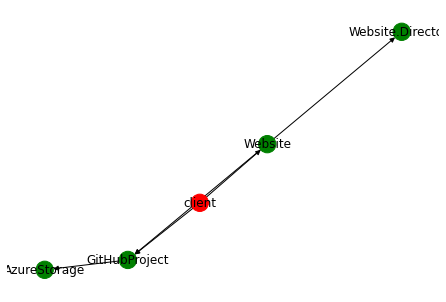

In [17]:
player.run_attack(source_node='client', target_node='GitHubProject', action_id=4)